Question 1: The Cost of Loops vs. Vectorization

In [5]:
#Write a Python function inner product loop(x, y) that computes the inner product of two
#Python lists x and y using a for loop.

def inner_product_loop(x: list[int | float], y: list[int | float]) -> float:
    if len(x) != len(y):
        print("Invalid inner product -- dimensions of vector x and vector y are different")
        return float("-inf")
    running_product = 0.0
    for idx in range(len(x)):
        running_product += x[idx] * y[idx]
    
    return running_product


In [6]:
# Write a second function inner product numpy(x, y) that computes the inner product of
# two NumPy arrays using np.dot() or the @ operator.
import numpy as np

def inner_product_numpy(x: np.array, y: np.array) -> float:
    if len(x) != len(y):
        print("Invalid inner product -- dimensions of vector x and vector y are different")
        return float("-inf")
    return x @ y

In [2]:
!pip install timeit

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement timeit (from versions: none)
ERROR: No matching distribution found for timeit


In [19]:
# Measure the execution time of both functions for vector dimensions p = 1000, 10^4, 10^5, 10^6, 5 * 10^6, 10^7. 
import timeit
import random
from sortedcontainers import SortedDict
vector_dimensions: list[int] = [1000, 10**4, 10**5, 10**6, 5 * 10 ** 6, 10**7]

python_execution_speeds = SortedDict({vector_dim: float("inf") for vector_dim in vector_dimensions})
numpy_execution_speeds = SortedDict({vector_dim: float("inf") for vector_dim in vector_dimensions})

for vector_dim in vector_dimensions:
    x = [random.random() for _ in range(vector_dim)]
    y = [random.random() for _ in range(vector_dim)]
    python_execution_speeds[vector_dim] = timeit.timeit(lambda: inner_product_loop(x, y), number=1)

    np_x = np.random.randn(vector_dim)
    np_y = np.random.randn(vector_dim)
    numpy_execution_speeds[vector_dim] = timeit.timeit(lambda: inner_product_numpy(np_x, np_y), number=1)

Plot saved as 'time_inner_product.png'


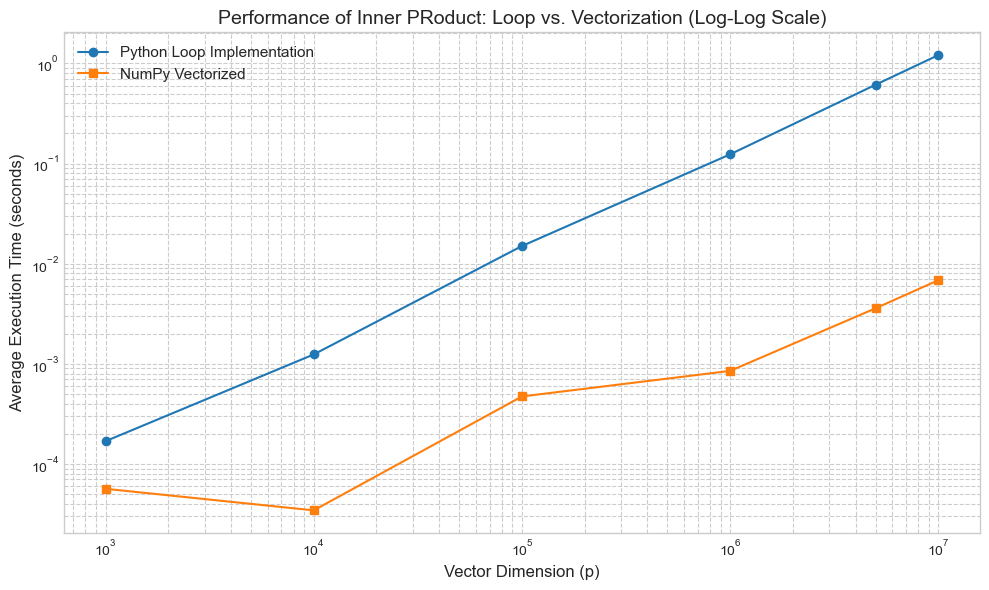

In [20]:
#Create a log-log plot showing dimension p on the x-axis and execution time in seconds on the 
# y-axis. Plot the performance of both functions. 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (10, 6))
plt.plot(vector_dimensions, list(python_execution_speeds.values()), 'o-', label = "Python Loop Implementation")
plt.plot(vector_dimensions, list(numpy_execution_speeds.values()), "s-", label = "NumPy Vectorized")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vector Dimension (p)', fontsize = 12)
plt.ylabel('Average Execution Time (seconds)', fontsize = 12)
plt.title("Performance of Inner PRoduct: Loop vs. Vectorization (Log-Log Scale)", fontsize = 14)
plt.legend(fontsize = 11)
plt.grid(True, which = "both", ls = "--")
plt.tight_layout()
plt.savefig("time_inner_product.png", bbox_inches = "tight")
print("Plot saved as 'time_inner_product.png'")
plt.show()

In [6]:
"""
Write a Python class named NaiveSparseVector.
The constructor init (self, p dim, values, indices) should store the dimension p dim,
a NumPy array values (for non-zero elements), and a NumPy array indices. You must also
implement the following method:
• dot(self, other): This method should compute the dot product between two NaiveSparseVector
instances. Crucially, your implementation should be efficient and avoid creating any
dense vectors.
"""
import numpy as np

class NaiveSparseVector:
    
    def __init__(self, p_dim: int, values: np.array, indices: np.array):
        self.p_dim: int = p_dim
        self.idx_to_values: dict[int, float] = {idx: val for idx, val in zip(indices, values)}
    
    def dot(self, other: "NaiveSparseVector"):
        if other.p_dim != self.p_dim:
            print("invalid dimensions")
            return float("-inf")
        
        dot_product = 0.0
        if len(self.idx_to_values) <= len(other.idx_to_values):
            for idx, val in self.idx_to_values.items():
                if idx in other.idx_to_values:
                    dot_product += self.idx_to_values[idx] * other.idx_to_values[idx]
        else:
            for idx, val in other.idx_to_values.items():
                if idx in self.idx_to_values:
                    dot_product += self.idx_to_values[idx] * other.idx_to_values[idx]
        return dot_product
    


In [9]:
"""
Generate Sparse Data. Write a function generate sparse pair(p dim, sparsity) that
returns two instances of your NaiveSparseVector class. Each vector should have dimen-
sion p dim and approximately p dim * sparsity non-zero elements at random indices, with
random values drawn from a standard normal distribution.
"""

def generate_sparse_pair(p_dim: int, sparsity: float) -> tuple[NaiveSparseVector, NaiveSparseVector]:
    num_nonzero_values = int(p_dim * sparsity)
    indices_v1 = np.random.choice(p_dim, size = num_nonzero_values, replace=False)
    values_v1 = np.random.randn(num_nonzero_values)


    indices_v2 = np.random.choice(p_dim, size = num_nonzero_values, replace=False)
    values_v2 = np.random.randn(num_nonzero_values)

    v1 = NaiveSparseVector(p_dim, values_v1, indices_v1)
    v2 = NaiveSparseVector(p_dim, values_v2, indices_v2)
    return (v1, v2)

In [10]:
"""
Performance Test 1: Naive Sparse Format. Generate 100 pairs of NaiveSparseVector
instances with dimension p = 107 and sparsity s = 0.1%. For each pair, compute their
dot product using your dot method and measure the time it takes. Calculate and print the
average time taken per dot product.
"""
import timeit
vector_pairs = [generate_sparse_pair(10**7, 0.001) for _ in range(100)]
dot_product_times = []

for v1, v2 in vector_pairs:
    dot_product_times.append(timeit.timeit(lambda: v1.dot(v2), number = 1))

print(np.mean(dot_product_times))

0.0018224009999721603


In [1]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [11]:
"""
Performance Test 2: Professional Sparse Format. The scipy library provides highly
optimized routines for sparse data. Repeat the experiment from part (f), but this time, rep-
resent your vectors using scipy.sparse.csr matrix (a common format for sparse vectors).
You will need to generate the same kind of random data but store it in this format. Measure
and print the average time taken to compute the dot product using SciPy’s built-in methods
(e.g., the @ operator or the .dot() method).
"""
from scipy.sparse import csr_matrix
from scipy.sparse import random as sparse_random
import timeit

def generate_sparse_pair_scipy(p_dim: int, sparsity: float):
    v1 = sparse_random(p_dim, 1, density = sparsity, format="csr")
    v2 = sparse_random(p_dim, 1, density = sparsity, format="csr")
    return v1, v2
vector_pairs = [generate_sparse_pair_scipy(10**7, 0.001) for _ in range(100)]
dot_product_times = []

for v1, v2 in vector_pairs:
    dot_product_times.append(timeit.timeit(lambda: v1.T @ v2, number = 1))
print(np.mean(dot_product_times))

0.2726208740000402


In [13]:
v1, v2 = generate_sparse_pair_scipy(10**7, 0.001)

t = timeit.timeit(lambda: v1.T @ v2, number=20) / 20
print(t)


0.03274109499998303


Question 3

In [ ]:
# In Python, implement both formulas and test them on the vector x = np.array([1e9, 1e9 + 1,
# 1e9 + 2]). Compare your results to np.std(x). Which formula gives the correct answer?

x = np.array([1e9, 1e9 + 1, 1e9 + 2])

# Formula one
def calculate_sd_two_pass(arr: np.arr):
    p = arr.size
    mean = np.mean(arr)

    for num in arr:
        
    pass

# Formula Two 
def calculate_sd_one_pass():

    pass